In [2]:
!pip install TextBlob


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     -------------------------------------  41.0/41.5 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 505.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---- ----------------------------------- 71.7/626.3 kB ? eta -:--:--
   ------------- -------------------------- 204.8/626.3 kB 4.1 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/626.3 kB 3.2 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/626.3 kB 3.2 MB/s eta 0:00:01
   ----------------------------------- ---- 563.2/626.3 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 4.7 MB/s eta 0:00:01


In [39]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from textblob import TextBlob

In [40]:
# Задание 1.
# Выберите датасет, который имеет отношение к вашей области интересов или исследований.
# Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи,
# например, анализа настроений или распознавания именованных сущностей.

Выбран датасет Singapore Airlines Reviews с kaggle.com:

https://www.kaggle.com/datasets/kanchana1990/singapore-airlines-reviews

In [41]:
# Загрузка датасета
reviews = pd.read_csv('singapore_airlines_reviews.csv', engine='python', on_bad_lines='skip')

In [8]:
reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [42]:
# Задание 2.
# Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета.
# Разработайте и реализуйте набор правил или условий,
# которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [43]:
# Определение функции для получения полярности настроения текста сообщения:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [44]:
# Применение функции к столбцу 'text' датасета для получения полярности настроения каждого твита
reviews['sentiment'] = reviews['text'].apply(get_sentiment)

In [12]:
reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,0.168006
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,0.176834
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,-0.170000
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,0.693750
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,-0.235648


In [45]:
# Определение функции для присвоения метки настроения на основе оценки полярности настроения
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [46]:
# Применение функции к столбцу 'sentiment' датасета для присвоения меток настроения
reviews['sentiment_label'] = reviews['sentiment'].apply(get_sentiment_label)

In [15]:
reviews

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,0.168006,positive
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,0.176834,positive
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,-0.170000,negative
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,0.693750,positive
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,-0.235648,negative
...,...,...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,0.442500,positive
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1,0.425000,positive
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1,0.479167,positive
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2,0.094444,positive


<Axes: >

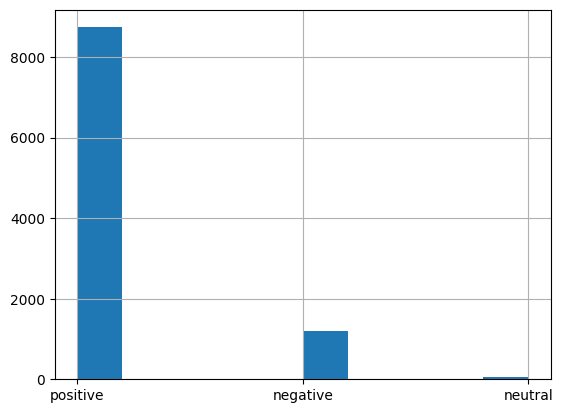

In [16]:
reviews['sentiment_label'].hist()

In [47]:
# Задача 3.
# Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

# Задача 4.
# Объедините данные, размеченные вручную, с данными, размеченными на основе правил.
# Объедините два подмножества размеченных данных в один набор данных,
# сохранив при этом соответствующую структуру и целостность.

Ручная разметка выполнена отдельно для датасета 'singapore_airlines_reviews.csv' в качестве демонстрации знакомства с инструментом.

In [48]:
# Задача 5.
# Обучите модель машинного обучения, используя объединенный набор размеченных данных.
# Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Для дальнейшей работы возьмем данные только с положительными или отрицательными сообщениями.

In [18]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.2/11.0 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.0 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.0 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/11.0 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/11.0 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/11.0 MB 2.2 MB/s eta 0:00:05
   ---- ----------------------------------- 1.1/11.0 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.0 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/11.0 MB 2.7 MB/s eta 0:00:04
   ------ ---


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [20]:
reviews = reviews[
    (reviews['sentiment_label'] == 'positive')
    | (reviews['sentiment_label'] == 'negative')
]

In [21]:
reviews['sentiment_label'].value_counts()

sentiment_label
positive    8738
negative    1197
Name: count, dtype: int64

In [49]:
# Замена 'negative' на 0 и 'positive' на 1
reviews['sentiment_label'] = reviews['sentiment_label'].replace({'negative': 0, 'positive': 1})

In [23]:
reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,0.168006,1
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,0.176834,1
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,-0.170000,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,0.693750,1
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,-0.235648,0


<Axes: >

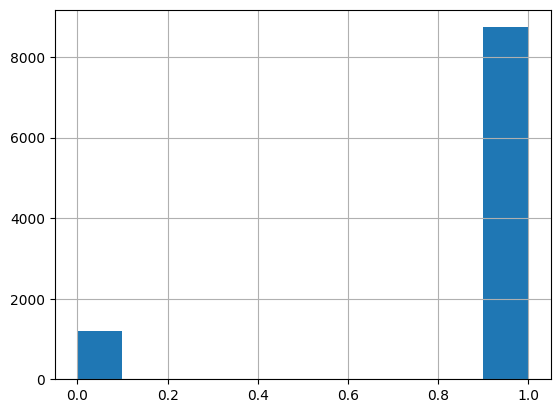

In [24]:
reviews['sentiment_label'].hist()

In [50]:
# Перемешивание данных
reviews = shuffle(reviews)

In [51]:
# Разделение датасета на размеченную и неразмеченную выборки
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.2, random_state=42)

In [27]:
labeled_reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
7758,2018-12-17T14:47:46-05:00,Mobile,5,review,Had a fantastic time on the trip- the crew wer...,Service on plane n food,0,0.640000,1
7588,2018-12-18T17:27:12-05:00,Desktop,5,review,I could not fault this airline one bit. Plenty...,The best flight I've had so far,0,0.431250,1
6450,2019-03-05T10:18:40-05:00,Desktop,4,review,We stopped over in Singapore for a few hours b...,Business Class,0,0.147619,1
6740,2019-02-22T20:04:17-05:00,Desktop,2,review,We had a comfortable flight from Melbourne to ...,Singapore Airlines are not what they were,1,0.069290,1
4103,2019-08-14T23:13:45-04:00,Desktop,3,review,"In flight service 6 star. Flight manager, prof...",Another Broken Seat,2,-0.030263,0


In [28]:
unlabeled_reviews.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
2777,2019-11-28T13:07:42-05:00,Desktop,2,review,Two flights plus return. Adelaide to Singapore...,Meal service a sham.,2,0.054440,1
7821,2018-12-17T11:48:16-05:00,Desktop,5,review,"Good service and food for us and infants, Staf...",Exellent Service,0,0.620000,1
2506,2019-12-09T15:19:13-05:00,Desktop,5,review,"Not my first time flying in SQ, never disappoi...",World Class Airline,1,0.387037,1
2595,2019-12-09T10:16:11-05:00,Mobile,5,review,"Singapore is always my first choice, the A380 ...",Family visit to Perth with stopover in Singapore,2,0.112059,1
3877,2019-09-04T03:12:41-04:00,Desktop,5,review,Flew Premium Economy for the first time from S...,Excellent Airline,1,0.201667,1


In [29]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_reviews):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_reviews['text'])
    y = labeled_reviews['sentiment_label']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [30]:
# Обучение начальной модели на небольшом наборе 
model, vectorizer = train_model(labeled_reviews)

In [31]:
# Использование исходной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_reviews['text'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [32]:
# Вычислить неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [33]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]

In [34]:
# Разметка новых точек данных и добавление их к размеченному множеству
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])

In [35]:
labeled_reviews

,published_date,published_platform,rating,type,text,title,helpful_votes,sentiment,sentiment_label
7758,2018-12-17T14:47:46-05:00,Mobile,5,review,Had a fantastic time on the trip- the crew wer...,Service on plane n food,0,0.640000,1
7588,2018-12-18T17:27:12-05:00,Desktop,5,review,I could not fault this airline one bit. Plenty...,The best flight I've had so far,0,0.431250,1
6450,2019-03-05T10:18:40-05:00,Desktop,4,review,We stopped over in Singapore for a few hours b...,Business Class,0,0.147619,1
6740,2019-02-22T20:04:17-05:00,Desktop,2,review,We had a comfortable flight from Melbourne to ...,Singapore Airlines are not what they were,1,0.069290,1
4103,2019-08-14T23:13:45-04:00,Desktop,3,review,"In flight service 6 star. Flight manager, prof...",Another Broken Seat,2,-0.030263,0
...,...,...,...,...,...,...,...,...,...
8391,2018-11-05T14:16:30-05:00,Desktop,4,review,"Everything is superb. Excellent service, luxur...",The greatest airline I have ever flown,1,0.805000,1
9462,2018-09-17T14:46:59-04:00,Desktop,5,review,"Best flight we have ever had,,, service was ex...",Amazing,0,0.900000,1
8045,2018-12-03T17:30:33-05:00,Desktop,5,review,World class best service to its customers with...,Amazing trip with FlySQ,0,0.509596,1
4006,2019-08-23T01:56:18-04:00,Desktop,5,review,Excellent flight to Melbourne on a 777. While ...,Another excellent experience with Singapore Ai...,2,0.616167,1


In [36]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_reviews)

In [37]:
# Задача 6.
# Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки.
# Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [38]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(unlabeled_reviews['text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(unlabeled_reviews['sentiment_label'], y_test_predicted)

print(f1)

0.936021973604877


Таким образом, модель на тестовом датасете оценилась в среднем с 0.9366,

т.е. с вероятностью около 93.66% модели удалось предсказать эмоциональную оценку сообщений на тестовой выборке.

Это довольно высокий результат.